In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Importing data
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Calls Data weekly.csv')
#Printing head
print(df.head())
print(df.tail())
print(df.shape)

         date   Calls
0  2017-06-05  156765
1  2017-06-12  132625
2  2017-06-19  122338
3  2017-06-26  121952
4  2017-07-03  148708
           date   Calls
118  2019-09-02  118753
119  2019-09-09  166199
120  2019-09-16  154386
121  2019-09-23  130366
122  2019-09-30  120030
(123, 2)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
date     123 non-null object
Calls    123 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
df[df.date.duplicated()]

date   Calls
84  2019-01-07  124460

In [6]:
print('Before Handling of duplicate calls:')
print(df.loc[83])
print(df.loc[84])
df.loc[83,'Calls'] = df.loc[83,'Calls'] + df.loc[84, 'Calls']
print('After Handling of duplicate calls:')
print(df.loc[83])
print(df.loc[84])

Before Handling of duplicate calls:
date     2019-01-07
Calls         40224
Name: 83, dtype: object
date     2019-01-07
Calls        124460
Name: 84, dtype: object
After Handling of duplicate calls:
date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-07
Calls        124460
Name: 84, dtype: object


In [0]:
df.drop([84], inplace=True)

In [8]:
print(df.loc[83])
print(df.loc[85])
print(df[df.date.duplicated()])
df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)
print(df)
print(df.loc[83])
print(df.loc[84])

date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-14
Calls        181634
Name: 85, dtype: object
Empty DataFrame
Columns: [date, Calls]
Index: []
           date   Calls
0    2017-06-05  156765
1    2017-06-12  132625
2    2017-06-19  122338
3    2017-06-26  121952
4    2017-07-03  148708
..          ...     ...
117  2019-09-02  118753
118  2019-09-09  166199
119  2019-09-16  154386
120  2019-09-23  130366
121  2019-09-30  120030

[122 rows x 2 columns]
date     2019-01-07
Calls        164684
Name: 83, dtype: object
date     2019-01-14
Calls        181634
Name: 84, dtype: object


In [9]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

Calls
date              
2017-06-05  156765
2017-06-12  132625
2017-06-19  122338
2017-06-26  121952
2017-07-03  148708
...            ...
2019-09-02  118753
2019-09-09  166199
2019-09-16  154386
2019-09-23  130366
2019-09-30  120030

[122 rows x 1 columns]

In [10]:
#Creating train and test set 
#Index 114 marks the end of train set and last 8 weeks are in test set which are to be forecasted for
train=df[0:114] 
test=df[114:]
print(train.head())
print(test)

             Calls
date              
2017-06-05  156765
2017-06-12  132625
2017-06-19  122338
2017-06-26  121952
2017-07-03  148708
             Calls
date              
2019-08-12  193092
2019-08-19  141962
2019-08-26  132027
2019-09-02  118753
2019-09-09  166199
2019-09-16  154386
2019-09-23  130366
2019-09-30  120030


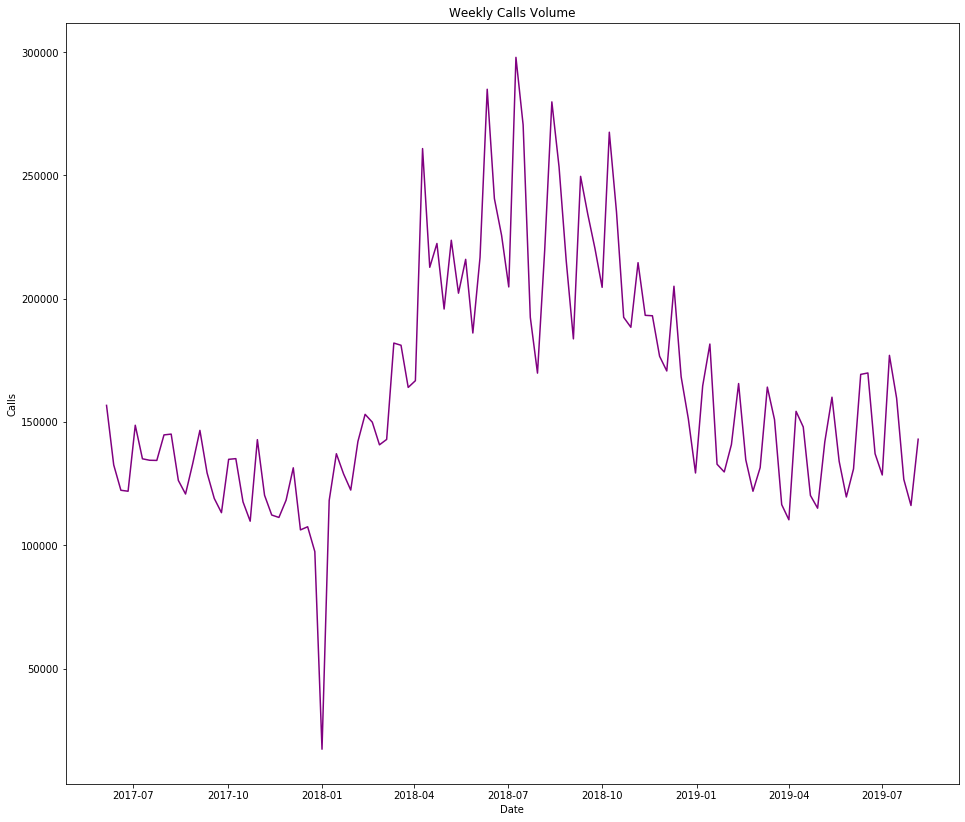

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize=(16, 14))

# Add the x-axis and the y-axis to the plot
ax.plot(train.index.values,
        train['Calls'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Calls",
       title="Weekly Calls Volume")

plt.show()
plt.savefig('time-series.png')

In [12]:
!pip install pyramid-arima


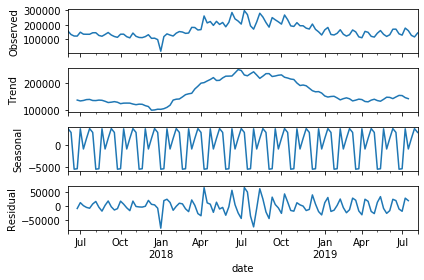

In [13]:
#Plotting the time series dataset's Trend, Seasonal and Residual Components
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Calls, freq = 7).plot()
result = sm.tsa.stattools.adfuller(train.Calls)
plt.show()

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model = 'multiplicative')

In [15]:
#ADF Test
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


(0.05289522855205975, False)

## **AUTO ARIMA METHOD**

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2446.205, BIC=2456.666, Fit time=0.153 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2464.016, BIC=2469.246, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2449.542, BIC=2460.002, Fit time=0.248 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2408.741, BIC=2419.201, Fit time=0.359 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2410.234, BIC=2423.310, Fit time=0.483 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2439.647, BIC=2447.492, Fit time=0.071 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=2409.726, BIC=2422.801, Fit time=0.991 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2410.773, BIC=2426.464, Fit time=1.260 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2396.832, BIC=2409.907, Fit time=1.770 seconds
Fit ARIMA: order=(1, 1, 0) s

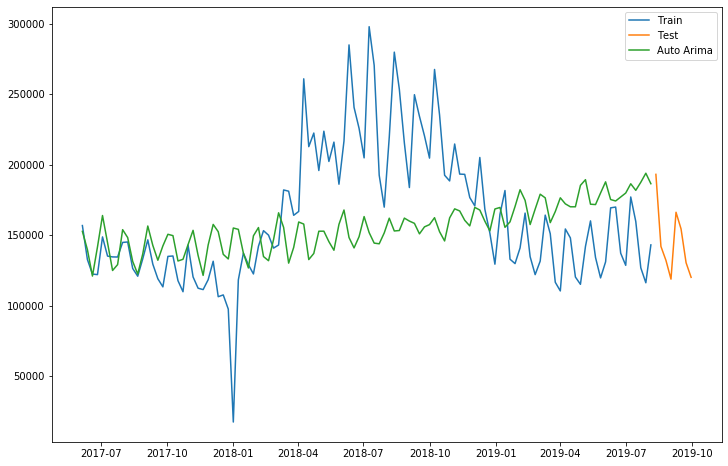

In [17]:
#Forecasting on train dataset
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pyramid.arima import auto_arima
y_hat_avg_auto = train.copy()
fit7 = auto_arima(train, start_p = 1, start_q = 1, max_p = 8, max_q = 8, start_P=0, start_Q = 0, max_P = 8, max_Q = 8, m = 12, seasonal = True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, stepwise = True, random_state = 20, n_fits = 30)
prediction = pd.DataFrame(fit7.predict(n_periods = 114), index = train.index)
prediction.columns = ['Predicted_Calls']
plt.figure(figsize=(12,8))
plt.plot(train['Calls'], label='Train')
plt.plot(test['Calls'], label='Test')
plt.plot(prediction['Predicted_Calls'], label='Auto Arima')
plt.legend(loc='best')
plt.show()

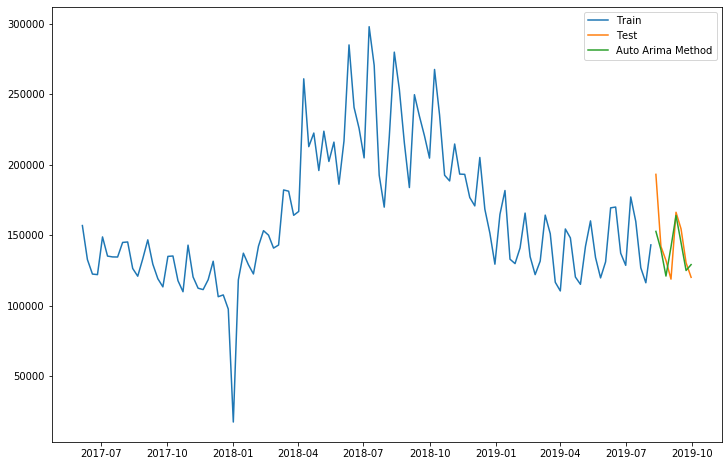

In [18]:
#Forecastong on test dataset
y_hat_avg_autoarm = test.copy()
forecasted = pd.DataFrame(fit7.predict(n_periods = 8), index = test.index)
forecasted.columns = ['Forecasted_Calls']
plt.figure(figsize=(12,8))
plt.plot(train['Calls'], label='Train')
plt.plot(test['Calls'], label='Test')
plt.plot(forecasted['Forecasted_Calls'], label='Auto Arima Method')
plt.legend(loc='best')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#Compute RMSE of train dataset
rms_arm_train = sqrt(mean_squared_error(train, prediction.Predicted_Calls))
print('RMSE with Auto ARIMA on train dataset: ',rms_arm_train)

#Compute RMSE of test dataset
rms_arm_test = sqrt(mean_squared_error(test, forecasted.Forecasted_Calls))
print('RMSE with Auto ARIMA on test dataset : ',rms_arm_test)
print('\n')

#MAPE of train dataset
mape_train = np.mean(np.abs(prediction.Predicted_Calls - y_hat_avg_auto.Calls)/np.abs(y_hat_avg_auto.Calls)*100)
print('MAPE of train dataset is:',mape_train)
print('Accuracy of Auto ARIMA on original train dataset is:',np.round((100 - mape_train),2))
print('\n')

#MAPE of test dataset
mape_test = np.mean(np.abs(forecasted.Forecasted_Calls - y_hat_avg_autoarm.Calls)/np.abs(y_hat_avg_autoarm.Calls)*100)  
print('MAPE of test dataset is:',mape_test)
print('Accuracy of Auto ARIMA on original test dataset is:',np.round((100 - mape_test),2))

RMSE with Auto ARIMA on train dataset:  50582.910869924606
RMSE with Auto ARIMA on test dataset :  17676.396264197327


MAPE of train dataset is: 28.40782360657568
Accuracy of Auto ARIMA on original train dataset is: 71.59


MAPE of test dataset is: 8.708842926127456
Accuracy of Auto ARIMA on original test dataset is: 91.29


In [20]:
y_hat_avg_autoarm['AutoARIMA_Forecast'] = forecasted.Forecasted_Calls
y_hat_avg_autoarm

Calls  AutoARIMA_Forecast
date                                  
2019-08-12  193092       152631.942898
2019-08-19  141962       139642.340592
2019-08-26  132027       120921.772139
2019-09-02  118753       141591.785508
2019-09-09  166199       163892.486354
2019-09-16  154386       144605.814454
2019-09-23  130366       124882.049236
2019-09-30  120030       129044.481621